# Querying the Chinook Database

## Imports and Setup

In [191]:
%%capture
# pandas module
import pandas as pd
import pandas_gbq
import matplotlib.pyplot as plt

# import sqlite3
import sqlite3

# colab modules
from google.colab import auth
from google.colab import syntax
from google.colab import userdata

In [192]:
# Install the sqlite package for Ubuntu
# Download the Chinook sqlite database
%%capture
%%bash
apt-get update
apt-get install -y sqlite3


In [193]:
%%bash
[ -f chinook.zip ] ||
  curl -s -O https://www.sqlitetutorial.net/wp-content/uploads/2018/03/chinook.zip
unzip -l chinook.zip


Archive:  chinook.zip
  Length      Date    Time    Name
---------  ---------- -----   ----
   884736  2015-11-29 10:53   chinook.db
---------                     -------
   884736                     1 file


In [194]:
!unzip -u chinook.zip

Archive:  chinook.zip


In [195]:
!ls -la

total 1180
drwxr-xr-x 1 root root   4096 Oct 29 05:14 .
drwxr-xr-x 1 root root   4096 Oct 29 05:12 ..
-rw-r--r-- 1 root root 884736 Nov 29  2015 chinook.db
-rw-r--r-- 1 root root 305596 Oct 29 05:14 chinook.zip
drwxr-xr-x 4 root root   4096 Oct 25 13:20 .config
drwxr-xr-x 1 root root   4096 Oct 25 13:20 sample_data


# Questions and Answers for my dataset
1. Details of the first 20 artists:
   The query returns the ArtistId and Name for the first 20 artists in the database. The output shows a variety of artists across different genres, including AC/DC, Accept, Aerosmith, Alanis Morissette, and many others.

2. Available music genres:
   The query returns 25 different genres, including Rock, Jazz, Metal, Alternative & Punk, Rock And Roll, Blues, Latin, Reggae, Pop, Soundtrack, and others.

3. Tracks composed by Wolfgang Amadeus Mozart:
   The query returns 5 tracks composed by Mozart, including "Eine Kleine Nachtmusik" Serenade In G, K. 525: I. Allegro, Concerto for Clarinet in A Major, K. 622: II. Adagio, and others.

4. Mozart tracks in the Classical genre:
   The query returns one track: "Die Zauberflöte, K.620: "Der Hölle Rache Kocht in Meinem Herze"".

5. Details of albums "Big Ones" and "Jagged Little Pill":
   The query returns the AlbumId, Title, and ArtistId for these two albums. "Big Ones" has AlbumId 5 and ArtistId 3, while "Jagged Little Pill" has AlbumId 6 and ArtistId 4.

6. Artists with names starting with "Bar":
   The query returns two artists: Barão Vermelho and Barry Wordsworth & BBC Concert Orchestra.

7. Tracks with durations between 100 and 200 seconds:
   The query returns 20 tracks that meet this criteria, including "C.O.D." by AC/DC, "Perfect" by Alanis Morissette, and others.

8. Tracks whose names start with "To":
   The query returns 5 tracks, including "Tomorrow's Dream", "Too Many Ways (Alternate)", and others.

9. Artists starting with "R", sorted alphabetically:
   The query returns 9 artists, including R.E.M., Raimundos, Raul Seixas, Red Hot Chili Peppers, and others.

10. Unique names of all playlists:
    The query returns 18 unique playlist names, including Music, Movies, TV Shows, 90's Music, and others.

11. Customers associated with each invoice:
    The query returns the InvoiceId and CustomerNames for each invoice, showing which customers are associated with each invoice.

12. Longest track in the database:
    The longest track is "Occupation / Precipice" with a duration of 5286953 milliseconds (about 88.11 minutes).

13. Shortest track in the database:
    The shortest track is "É Uma Partida De Futebol" with a duration of 1071 milliseconds (about 1.07 seconds).

14. Total length of all tracks combined:
    The total length of all tracks is 1378778040 milliseconds, which is equivalent to about 383 hours of playtime.

15. Average length of a track:
    The average length of a track is 393599.212103911 milliseconds, which is about 6.56 minutes.

16. Job titles of employees:
    The query returns 7 unique job titles: General Manager, Sales Manager, Sales Support Agent, IT Manager, and IT Staff.

17. Number of employees working as Sales Support Agents:
    There are 3 employees working as Sales Support Agents.

18. Number of tracks in each playlist:
    The query returns the number of tracks for each playlist, ranging from 1 to 3290 tracks per playlist.

19. Top 10 albums with titles, total lengths, and number of tracks:
    The query returns details for the top 10 albums, including "For Those About To Rock We Salute You", "Balls to the Wall", "Restless and Wild", and others.

20. Relationship between album length and number of tracks:
    The query provides data for plotting the relationship between album length and number of tracks, which can be visualized in a scatter plot.

## Basic Queries


In [196]:
# Get a list of the tables in the database
%%script sqlite3 --column --header chinook.db
.tables


albums          employees       invoices        playlists     
artists         genres          media_types     tracks        
customers       invoice_items   playlist_track


In [197]:
%%script sqlite3 --column --header chinook.db
.schema albums

CREATE TABLE IF NOT EXISTS "albums"
(
    [AlbumId] INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
    [Title] NVARCHAR(160)  NOT NULL,
    [ArtistId] INTEGER  NOT NULL,
    FOREIGN KEY ([ArtistId]) REFERENCES "artists" ([ArtistId]) 
		ON DELETE NO ACTION ON UPDATE NO ACTION
);
CREATE INDEX [IFK_AlbumArtistId] ON "albums" ([ArtistId]);


In [198]:
%%script sqlite3 --column --header chinook.db
.schema artists

CREATE TABLE IF NOT EXISTS "artists"
(
    [ArtistId] INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
    [Name] NVARCHAR(120)
);


### SELECT (with * and with column names)
What are the details of the first 20 artists in the database

In [222]:
%%script sqlite3 --column --header chinook.db
SELECT *
FROM artists
 LIMIT 20

ArtistId  Name                       
--------  ---------------------------
1         AC/DC                      
2         Accept                     
3         Aerosmith                  
4         Alanis Morissette          
5         Alice In Chains            
6         Antônio Carlos Jobim       
7         Apocalyptica               
8         Audioslave                 
9         BackBeat                   
10        Billy Cobham               
11        Black Label Society        
12        Black Sabbath              
13        Body Count                 
14        Bruce Dickinson            
15        Buddy Guy                  
16        Caetano Veloso             
17        Chico Buarque              
18        Chico Science & Nação Zumbi
19        Cidade Negra               
20        Cláudio Zoli               


In [200]:
%%script sqlite3 --column --header chinook.db
SELECT *
FROM genres



GenreId  Name              
-------  ------------------
1        Rock              
2        Jazz              
3        Metal             
4        Alternative & Punk
5        Rock And Roll     
6        Blues             
7        Latin             
8        Reggae            
9        Pop               
10       Soundtrack        
11       Bossa Nova        
12       Easy Listening    
13       Heavy Metal       
14       R&B/Soul          
15       Electronica/Dance 
16       World             
17       Hip Hop/Rap       
18       Science Fiction   
19       TV Shows          
20       Sci Fi & Fantasy  
21       Drama             
22       Comedy            
23       Alternative       
24       Classical         
25       Opera             


### 1. WHERE

In [201]:
%%script sqlite3 --column --header chinook.db
SELECT *
FROM tracks
WHERE composer = 'Wolfgang Amadeus Mozart'

TrackId  Name                                                                                      AlbumId  MediaTypeId  GenreId  Composer                 Milliseconds  Bytes    UnitPrice
-------  ----------------------------------------------------------------------------------------  -------  -----------  -------  -----------------------  ------------  -------  ---------
3412     "Eine Kleine Nachtmusik" Serenade In G, K. 525: I. Allegro                                281      2            24       Wolfgang Amadeus Mozart  348971        5760129  0.99     
3413     Concerto for Clarinet in A Major, K. 622: II. Adagio                                      282      2            24       Wolfgang Amadeus Mozart  394482        6474980  0.99     
3451     Die Zauberflöte, K.620: "Der Hölle Rache Kocht in Meinem Herze"                           317      2            25       Wolfgang Amadeus Mozart  174813        2861468  0.99     
3454     Symphony No. 41 in C Major, K. 551, "Jupiter": IV. 

### 2. AND

In [202]:
%%script sqlite3 --column --header chinook.db
SELECT *
FROM tracks
WHERE composer = 'Wolfgang Amadeus Mozart'
AND
GenreId = 25


TrackId  Name                                                             AlbumId  MediaTypeId  GenreId  Composer                 Milliseconds  Bytes    UnitPrice
-------  ---------------------------------------------------------------  -------  -----------  -------  -----------------------  ------------  -------  ---------
3451     Die Zauberflöte, K.620: "Der Hölle Rache Kocht in Meinem Herze"  317      2            25       Wolfgang Amadeus Mozart  174813        2861468  0.99     


### 3. OR


In [203]:
%%script sqlite3 --column --header chinook.db
SELECT *
FROM albums
WHERE Title = 'Big Ones'
OR
Title = 'Jagged Little Pill'

AlbumId  Title               ArtistId
-------  ------------------  --------
5        Big Ones            3       
6        Jagged Little Pill  4       


### 4. LIKE (with % or _ wildcard)


In [204]:
%%script sqlite3 --column --header chinook.db
SELECT *
FROM artists
WHERE Name LIKE 'Bar%';

ArtistId  Name                                    
--------  ----------------------------------------
48        Barão Vermelho                          
224       Barry Wordsworth & BBC Concert Orchestra


### 5. BETWEEN


In [205]:
%%script sqlite3 --column --header chinook.db
SELECT *
FROM tracks
WHERE Milliseconds BETWEEN 100000 AND 200000
LIMIT 20

TrackId  Name                                          AlbumId  MediaTypeId  GenreId  Composer                                                                     Milliseconds  Bytes    UnitPrice
-------  --------------------------------------------  -------  -----------  -------  ---------------------------------------------------------------------------  ------------  -------  ---------
11       C.O.D.                                        1        1            1        Angus Young, Malcolm Young, Brian Johnson                                    199836        6566314  0.99     
40       Perfect                                       6        1            1        Alanis Morissette & Glenn Ballard                                            188133        6145404  0.99     
42       Right Through You                             6        1            1        Alanis Morissette & Glenn Ballard                                            176117        5793082  0.99     
51       We Die Youn

### LIMIT



In [206]:
%%script sqlite3 --column --header chinook.db
SELECT *
FROM tracks
WHERE Name LIKE 'To%'
LIMIT 5

TrackId  Name                       AlbumId  MediaTypeId  GenreId  Composer                                             Milliseconds  Bytes     UnitPrice
-------  -------------------------  -------  -----------  -------  ---------------------------------------------------  ------------  --------  ---------
157      Tomorrow's Dream           17       1            3        Tony Iommi, Bill Ward, Geezer Butler, Ozzy Osbourne  192496        6252071   0.99     
203      Too Many Ways (Alternate)  20       1            6        Willie Dixon                                         135053        4459946   0.99     
498      Too Many Tears             40       1            1        Adrian Vanderberg/David Coverdale                    359497        11810238  0.99     
531      Top Top                    42       1            4        Os Mutantes - Arnolpho Lima Filho                    146938        4875374   0.99     
699      Tombstone Shadow           55       1            1        J.C. Foge

## Sorting and Grouping


### ORDER BY


In [207]:
%%script sqlite3 --column --header chinook.db
SELECT *
FROM artists
WHERE Name LIKE 'R%'
ORDER BY Name

ArtistId  Name                                                    
--------  --------------------------------------------------------
124       R.E.M.                                                  
123       R.E.M. Feat. KRS-One                                    
122       R.E.M. Feat. Kate Pearson                               
125       Raimundos                                               
126       Raul Seixas                                             
127       Red Hot Chili Peppers                                   
178       Regina Spektor                                          
207       Richard Marlow & The Choir of Trinity College, Cambridge
184       Rodox                                                   
261       Roger Norrington, London Classical Players              
217       Royal Philharmonic Orchestra & Sir Thomas Beecham       
128       Rush                                                    


### DISTINCT


In [208]:
%%script sqlite3 --column --header chinook.db
SELECT DISTINCT Name
FROM playlists;

Name                      
--------------------------
Music                     
Movies                    
TV Shows                  
Audiobooks                
90’s Music                
Music Videos              
Brazilian Music           
Classical                 
Classical 101 - Deep Cuts 
Classical 101 - Next Steps
Classical 101 - The Basics
Grunge                    
Heavy Metal Classic       
On-The-Go 1               


### GROUP BY



In [209]:
# What is the Customers full name for each invoice?
%%script sqlite3 --column --header chinook.db
SELECT
    InvoiceId,
    GROUP_CONCAT(FirstName || ' ' || LastName) AS CustomerNames
FROM
    Customers
JOIN
    Invoices ON Customers.CustomerId = Invoices.CustomerId
GROUP BY
    InvoiceId
ORDER BY CustomerNames
LIMIT 50

InvoiceId  CustomerNames  
---------  ---------------
50         Aaron Mitchell 
61         Aaron Mitchell 
116        Aaron Mitchell 
245        Aaron Mitchell 
268        Aaron Mitchell 
290        Aaron Mitchell 
342        Aaron Mitchell 
57         Alexandre Rocha
68         Alexandre Rocha
123        Alexandre Rocha
252        Alexandre Rocha
275        Alexandre Rocha
297        Alexandre Rocha
349        Alexandre Rocha
78         Astrid Gruber  
89         Astrid Gruber  
144        Astrid Gruber  
273        Astrid Gruber  
296        Astrid Gruber  
318        Astrid Gruber  
370        Astrid Gruber  
2          Bjørn Hansen   
24         Bjørn Hansen   
76         Bjørn Hansen   
197        Bjørn Hansen   
208        Bjørn Hansen   
263        Bjørn Hansen   
392        Bjørn Hansen   
105        Camille Bernard
128        Camille Bernard
150        Camille Bernard
202        Camille Bernard
323        Camille Bernard
334        Camille Bernard
389        Camille Bernard
3

## Aggregates


### MAX


In [210]:
# What is the longest track?
%%script sqlite3 --column --header chinook.db
SELECT name, MAX(Milliseconds) FROM tracks;

Name                    MAX(Milliseconds)
----------------------  -----------------
Occupation / Precipice  5286953          


### MIN


In [211]:
# What is the shortest track?
%%script sqlite3 --column --header chinook.db
SELECT name, MIN(Milliseconds) FROM tracks;

Name                      MIN(Milliseconds)
------------------------  -----------------
É Uma Partida De Futebol  1071             


### SUM


In [212]:
# What is the length of all tracks together ?
%%script sqlite3 --column --header chinook.db
SELECT SUM(Milliseconds) FROM tracks;

SUM(Milliseconds)
-----------------
1378778040       


In [213]:
milliseconds = 1378778040
seconds = milliseconds / 1000
minutes = seconds / 60
hours = minutes / 60
print(f'{seconds:.0f} seconds')
print(f'{minutes:.0f} minutes')
print(f'{hours:.0f} hours of playtime')

1378778 seconds
22980 minutes
383 hours of playtime


### AVG


In [214]:
# What is the average length of a track?
%%script sqlite3 --column --header chinook.db
SELECT AVG(Milliseconds) FROM tracks;

AVG(Milliseconds)
-----------------
393599.212103911 


In [215]:
milliseconds = 393599.212103911
seconds = milliseconds / 1000
minutes = seconds / 60
hours = minutes / 60
print(f'{seconds:.0f} seconds')
print(f'{minutes:.2f} minutes')

394 seconds
6.56 minutes


### COUNT



In [216]:
%%script sqlite3 --column --header chinook.db
SELECT title FROM employees;

Title              
-------------------
General Manager    
Sales Manager      
Sales Support Agent
Sales Support Agent
Sales Support Agent
IT Manager         
IT Staff           
IT Staff           


In [217]:
# How many employees are sales agents?
%%script sqlite3 --column --header chinook.db
SELECT COUNT(*)
FROM employees
WHERE Title = 'Sales Support Agent';

COUNT(*)
--------
3       


## Plotting Number of Tracks per Playlist

In [218]:
%%script sqlite3 --column --header chinook.db
SELECT
    p.Name AS PlaylistName,
    COUNT(pt.TrackId) AS NumberOfTracks
FROM
    playlists AS p
JOIN
    playlist_track AS pt ON p.PlaylistId = pt.PlaylistId
GROUP BY
    p.PlaylistId;

PlaylistName                NumberOfTracks
--------------------------  --------------
Music                       3290          
TV Shows                    213           
90’s Music                  1477          
Music                       3290          
Music Videos                1             
TV Shows                    213           
Brazilian Music             39            
Classical                   75            
Classical 101 - Deep Cuts   25            
Classical 101 - Next Steps  25            
Classical 101 - The Basics  25            
Grunge                      15            
Heavy Metal Classic         26            
On-The-Go 1                 1             


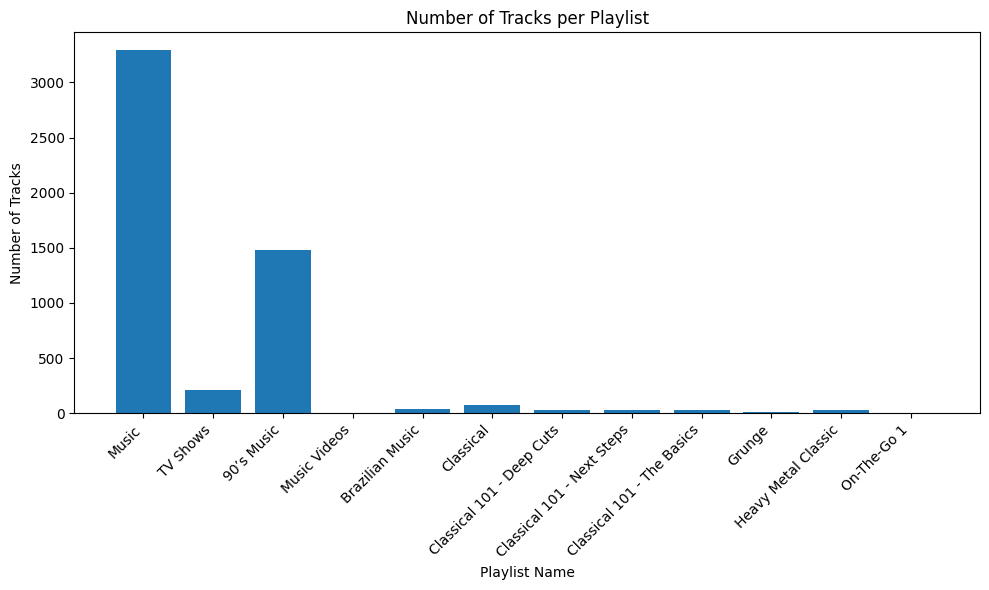

In [219]:
# Connect to the database
conn = sqlite3.connect('chinook.db')

# SQL query to get data for the plot
sql = """
SELECT
    p.Name AS PlaylistName,
    COUNT(pt.TrackId) AS NumberOfTracks
FROM
    playlists AS p
JOIN
    playlist_track AS pt ON p.PlaylistId = pt.PlaylistId
GROUP BY
    p.PlaylistId;
"""

# Read the data directly into a pandas DataFrame
df = pd.read_sql_query(sql, conn)

# Close the connection
conn.close()

# Create the plot
plt.figure(figsize=(10, 6))
plt.bar(df['PlaylistName'], df['NumberOfTracks'])
plt.xlabel("Playlist Name")
plt.ylabel("Number of Tracks")
plt.title("Number of Tracks per Playlist")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


## Plotting Album Length and Number of Tracks per Album

In [220]:
%%script sqlite3 --column --header chinook.db
SELECT
    al.Title AS AlbumTitle,  -- Select the album title
    SUM(t.Milliseconds) AS AlbumLength,  -- Calculate total album length in milliseconds
    COUNT(t.TrackId) AS NumberOfTracks
FROM
    tracks AS t
JOIN
    albums AS al ON t.AlbumId = al.AlbumId
GROUP BY
    al.AlbumId, al.Title
LIMIT 10;

AlbumTitle                             AlbumLength  NumberOfTracks
-------------------------------------  -----------  --------------
For Those About To Rock We Salute You  2400415      10            
Balls to the Wall                      342562       1             
Restless and Wild                      858088       3             
Let There Be Rock                      2453259      8             
Big Ones                               4411709      15            
Jagged Little Pill                     3450925      13            
Facelift                               3249365      12            
Warner 25 Anos                         2906926      14            
Plays Metallica By Four Cellos         2671407      8             
Audioslave                             3927713      14            


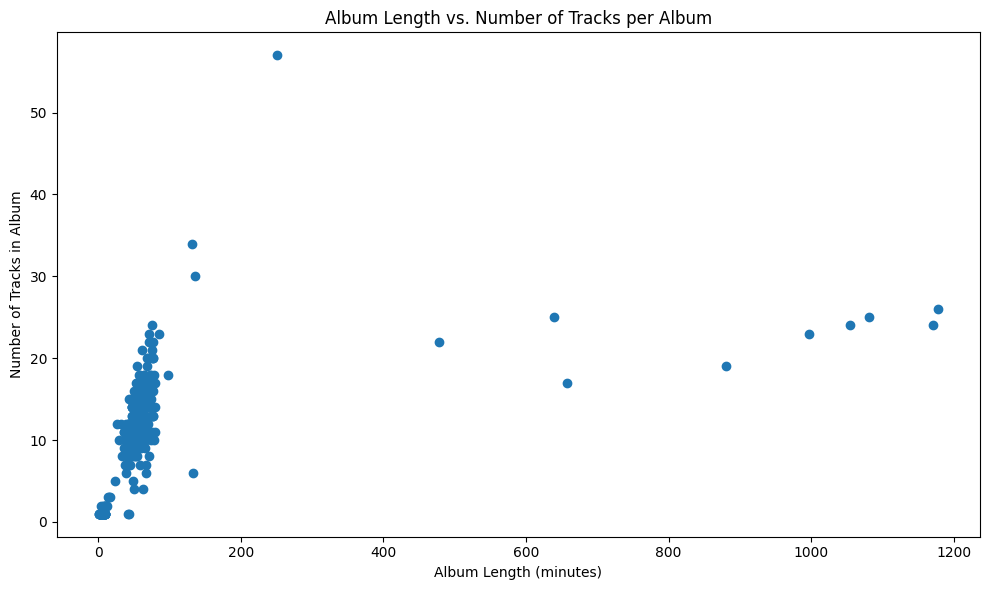

In [221]:
# Connect to the database
conn = sqlite3.connect('chinook.db')

# SQL query to get the length of tracks in milliseconds and the number of tracks in each album
sql = """
SELECT
    al.Title AS AlbumTitle,
    SUM(t.Milliseconds) AS AlbumLength,
    COUNT(t.TrackId) AS NumberOfTracks
FROM
    tracks AS t
JOIN
    albums AS al ON t.AlbumId = al.AlbumId
GROUP BY
    al.AlbumId, al.Title
"""

# Read the data directly into a pandas DataFrame
df = pd.read_sql_query(sql, conn)

# Close the connection
conn.close()

# Convert milliseconds to minutes
df['AlbumLengthMinutes'] = df['AlbumLength'] / 60000

# Create the plot
plt.figure(figsize=(10, 6))
plt.scatter(df['AlbumLengthMinutes'], df['NumberOfTracks'])
plt.xlabel("Album Length (minutes)")
plt.ylabel("Number of Tracks in Album")
plt.title("Album Length vs. Number of Tracks per Album")
plt.tight_layout()
plt.show()